# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('../data/absences.csv')
data = data[['EmployeeID','Age','Absences']]
data

,EmployeeID,Age,Absences
0,1,27,15
1,2,61,6
2,3,37,10
3,4,23,18
4,5,46,9
5,6,58,7
6,7,29,14
7,8,36,11
8,9,64,5
9,10,40,8


#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

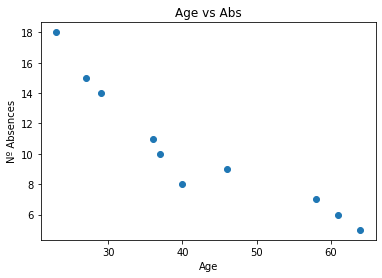

In [2]:
# your code here
plt.scatter(data['Age'] , data['Absences'])
plt.title('Age vs Abs')
plt.xlabel('Age')
plt.ylabel('Nº Absences')
plt.show()


In [3]:
# your comments here

'''
We can observe a negative relationship between the 2 variables.
'''

'\nWe can observe a negative relationship between the 2 variables.\n'

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [41]:
# your code here
abse = data.Absences.values.tolist()
ages = data.Age.values.tolist()

def slope(x,y):
    numerator = 0
    denominator = 0
    me_x = sum(x)/len(x) #mean of x: ages
    me_y = sum(y)/len(y) #mean of y: absences
    
    for i,j in zip(x,y):
        numerator += ((j-me_y)*(i-me_x))
        denominator += (i-me_x)**2
    m = numerator/denominator
    return m

slope_1 = slope(ages,abse)



def intercept(x,y,slope_1):
    me_x = sum(x)/len(x)
    me_y = sum(y)/len(y)
    
    a = me_y - slope_1*me_x
    return a


a = intercept(ages,abse,slope_1)

print(slope_1)
print(a)

-0.2681088337033404
21.58738189891063


#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

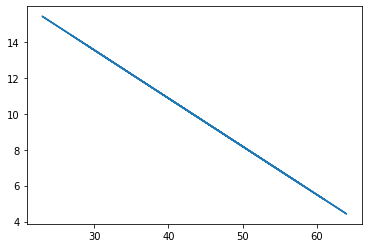

In [45]:
# your code here



#Let's plot it:

plt.plot(data['Age'], data['Age']*slope_1 + a)


In [46]:
# your comments here

'''
We observe a line, a beautiful line.


With a negative tendency and a intercept of 21.59, and a slope of -0.27 . 
'''

'\nWe observe a line, a beautiful line.\n\n\nWith a negative tendency and a intercept of 21.59, and a slope of -0.27 . \n'

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [47]:
# your code here

def covariance(x,y):
    numerator = 0
    denominator = 0
    me_x = sum(x)/len(x) #mean of x: ages
    me_y = sum(y)/len(y) #mean of y: absences
    
    for i,j in zip(x,y):
        numerator += ((j-me_y)*(i-me_x))
        denominator = len(x)
    m = numerator/denominator
    return m


def correlation(x,y):
    
    return (covariance(x,y)/(x.std()*y.std()))
            
            
            
    
    
    
    

#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [48]:
# your code here
abse = data.Absences.values.tolist()
ages = data.Age.values.tolist()

print(covariance(ages,abse))

print(correlation(data['Age'],data['Absences']))

-51.92999999999999
-0.839289068323291


In [49]:
# your comments here

'''
we observe a similar tendency for both values find in a negative tendency.

Been both variable strongly related.

'''

'\nwe observe a similar tendency for both values find in a negative tendency.\n\nBeen both variable strongly related.\n\n'

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [50]:
# your comments here

'''



'''

'\n\n\n\n'

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [51]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})
ironbeers_df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,9


#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [52]:
# your code here

print(covariance(ironbeers_df['X'],ironbeers_df['Y']))

print(correlation(ironbeers_df['X'],ironbeers_df['Y']))


10.5
0.8548823683035951


In [53]:
# your comments here

'''
The covariance is positive meaning the correlation is direct between both variables.

However, the correlation is strong, which make the relation of both variables nearly 1.


'''

'\nThe covariance is positive meaning the correlation is direct between both variables.\n\nHowever, the correlation is strong, which make the relation of both variables nearly 1.\n\n\n'

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

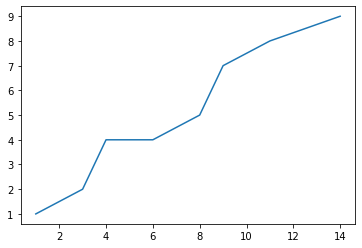

In [54]:
# your code here
plt.plot(ironbeers_df['X'],ironbeers_df['Y'])



In [55]:
# your comments here

'''
We observe the same result as the previous question. Direct relation and a strong relation between the variables.

'''

'\nWe observe the same result as the previous question. Direct relation and a strong relation between the variables.\n\n'

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

In [56]:
# your code here

X = ironbeers_df['X'].values.tolist()
Y = ironbeers_df['Y'].values.tolist()

m = slope(X,Y)


j = intercept(X,Y,m)


print(m, j)

0.6363636363636364 0.5454545454545459


In [ ]:
ironbeers_df.info()

In [ ]:
# your comments here
'''
We can observe there can be a positive correlation, not very strong. And the covarianza of both
variable is direct but not that direct as it could see in eye.


'''



#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# your comments here

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here